In [1]:
import pprint
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from lineartree import LinearTreeClassifier, LinearTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification, make_regression

# Regression

In [2]:
X, y = make_regression(n_samples=5000, n_features=15,
                       n_informative=6, n_targets=1,
                       random_state=0, shuffle=False)

In [3]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())
regr.fit(X, y)  # supports also multi-target and sample_weights

LinearTreeRegressor(base_estimator=LinearRegression())

In [4]:
regr.score(X, y)

1.0

In [5]:
regr.predict(X)

array([ 338.95003676, -165.75013868, -236.96275749, ...,  -79.32021772,
         19.52147439,  112.50769025])

In [6]:
regr.apply(X)

array([10, 10,  9, ...,  3, 10,  5], dtype=int64)

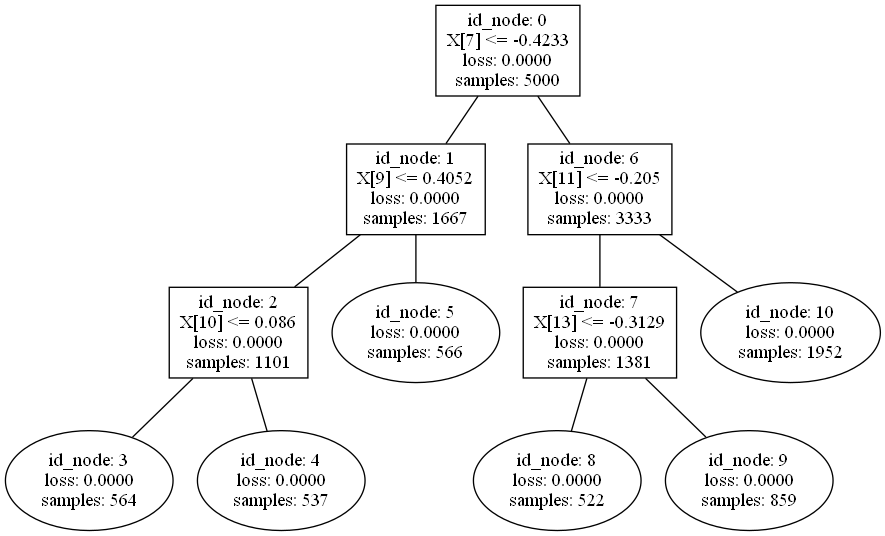

In [7]:
regr.plot_model()

In [8]:
pprint.pprint(regr.summary())

{0: {'children': (1, 6),
     'col': 7,
     'loss': 0.0,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 5000,
     'th': -0.4233},
 1: {'children': (2, 5),
     'col': 9,
     'loss': 0.0,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1667,
     'th': 0.4052},
 2: {'children': (3, 4),
     'col': 10,
     'loss': 0.0,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1101,
     'th': 0.086},
 3: {'loss': 0.0, 'models': LinearRegression(), 'samples': 564},
 4: {'loss': 0.0, 'models': LinearRegression(), 'samples': 537},
 5: {'loss': 0.0, 'models': LinearRegression(), 'samples': 566},
 6: {'children': (7, 10),
     'col': 11,
     'loss': 0.0,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 3333,
     'th': -0.205},
 7: {'children': (8, 9),
     'col': 13,
     'loss': 0.0,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1381,
     'th': -0.3129},
 8: {'loss': 0.

# Classification

In [9]:
X, y = make_classification(n_samples=5000, n_features=15,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [10]:
clf = LinearTreeClassifier(base_estimator=RidgeClassifier())
clf.fit(X, y)  # supports also sample_weights

LinearTreeClassifier(base_estimator=RidgeClassifier())

In [11]:
clf.score(X, y)

0.9764

In [12]:
clf.predict(X)

array([0, 0, 0, ..., 0, 1, 1])

In [13]:
clf.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [14]:
clf.apply(X)

array([ 3,  3,  3, ...,  4, 10,  9], dtype=int64)

In [15]:
clf.decision_path(X)

<5000x11 sparse matrix of type '<class 'numpy.int64'>'
	with 18002 stored elements in Compressed Sparse Row format>

In [16]:
pprint.pprint(clf.summary())

{0: {'children': (1, 6),
     'col': 0,
     'loss': 0.074,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 5000,
     'th': 0.5429},
 1: {'children': (2, 5),
     'col': 1,
     'loss': 0.0441,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 3125,
     'th': 0.0776},
 2: {'children': (3, 4),
     'col': 0,
     'loss': 0.0493,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 1687,
     'th': -0.8686},
 3: {'classes': array([0, 1]),
     'loss': 0.0026,
     'models': RidgeClassifier(),
     'samples': 765},
 4: {'classes': array([0, 1]),
     'loss': 0.0466,
     'models': RidgeClassifier(),
     'samples': 922},
 5: {'classes': array([0, 1]),
     'loss': 0.0174,
     'models': RidgeClassifier(),
     'samples': 1438},
 6: {'children': (7, 8),
     'col': 1,
     'loss': 0.0552,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 1875,
     'th': -0.4208},
 7: {'classes': array([0, 1]),
     'loss'

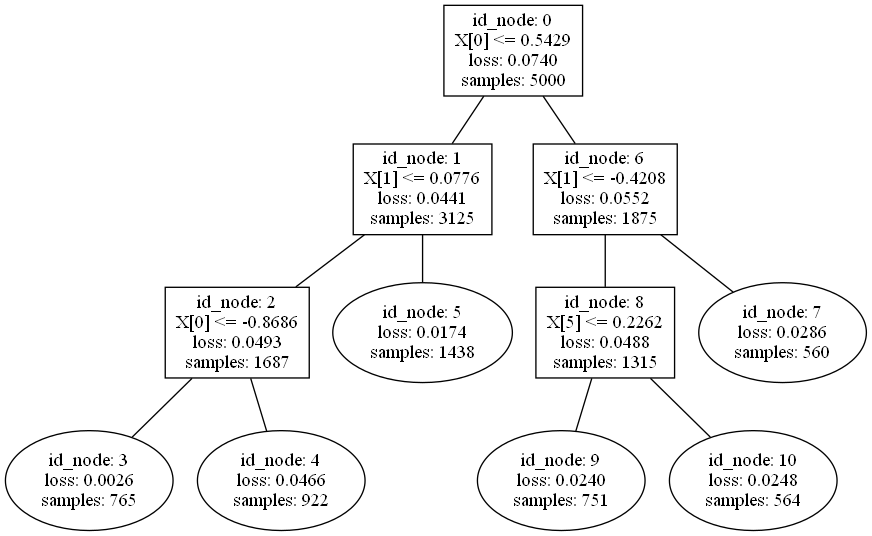

In [17]:
clf.plot_model()

# Hyperparameter Tuning

In [18]:
parameters = {'base_estimator__alpha': [1,10], 'max_depth': [3,5,10]}

search = GridSearchCV(LinearTreeClassifier(RidgeClassifier()), parameters, cv=3, n_jobs=-1)
search.fit(X,y)

GridSearchCV(cv=3,
             estimator=LinearTreeClassifier(base_estimator=RidgeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__alpha': [1, 10],
                         'max_depth': [3, 5, 10]})

In [19]:
search.best_params_

{'base_estimator__alpha': 1, 'max_depth': 3}

# ERROR with NOT Linear Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
clf = LinearTreeClassifier(base_estimator=KNeighborsClassifier())
clf.fit(X, y)  # ERROR

ValueError: Only linear models are accepted as base_estimator. Select one from linear_model class of scikit-learn.